Maze:


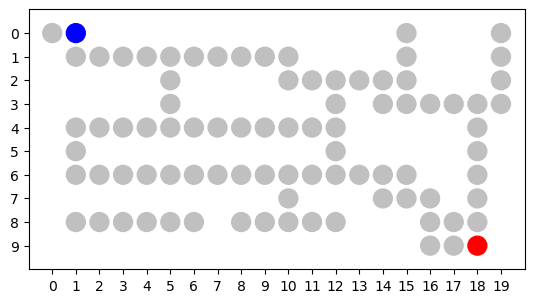

Path Map from DFS:


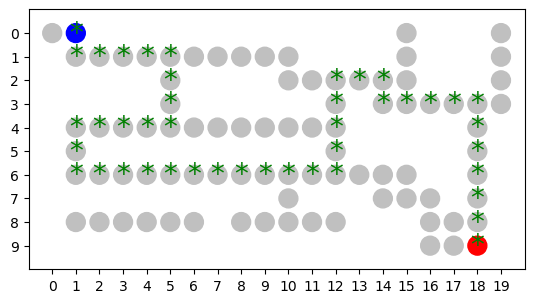

Path from Depth First Search: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (2, 13), (2, 14), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (4, 18), (5, 18), (6, 18), (7, 18), (8, 18), (9, 18)]
DFS Path Length :43
Current memory usage: 0 bytes
Peak memory usage: 5680 bytes
Path Map from BFS:


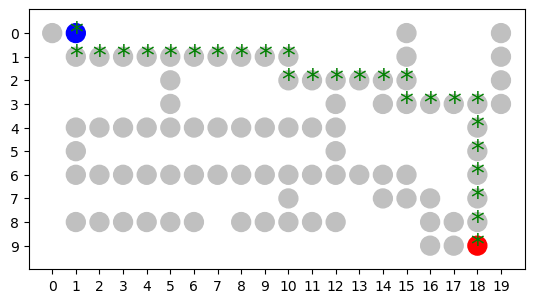

Path from Breadth First Search: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 15), (3, 16), (3, 17), (3, 18), (4, 18), (5, 18), (6, 18), (7, 18), (8, 18), (9, 18)]
BFS Path Length :27
Current memory usage: 0 bytes
Peak memory usage: 13168 bytes
Path Map from A*:


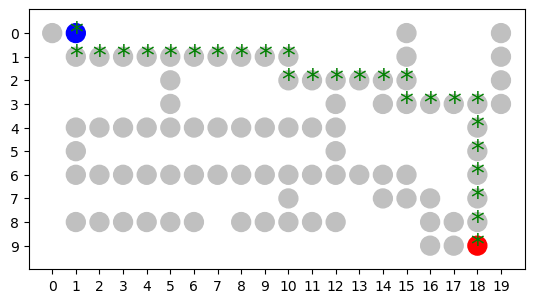

Path from A* Search: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 15), (3, 16), (3, 17), (3, 18), (4, 18), (5, 18), (6, 18), (7, 18), (8, 18), (9, 18)]
A* Path Length :27
Current memory usage: 0 bytes
Peak memory usage: 4080 bytes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tracemalloc as tm
from collections import deque
import heapq
# Represent the maze as a numpy array By 10, 1*20 arrays
# 1 represents walls and 0 represents open space

maze=np.array([
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0],
    [1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0],
    [1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1],
    [1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1]             
])
# Get the number of rows and columns
rows, cols = maze.shape

# Set start and destination
start=(0,1)
destination=(9,18)

# Directions to traverse
#(0,1)-right,(1,0)-down,(0,-1)-left,(-1,0)-up
directions=[(0, 1), (1, 0), (0, -1), (-1, 0)]

# Visualize the maze with walls and free space 

def draw_maze(path=None):
    fig, ax = plt.subplots()   
    # Iterate through the maze and draw circles
    for i in range(rows):
        for j in range(cols):
            if maze[i, j] == 0:               
                # Draw filled colored circles for 0 - Plot start and destination in different colors
                if(j==1 and i==0):
                    circle = plt.Circle((j, i), 0.4, color='blue', fill=True)
                elif(j==18 and i==9):
                    circle = plt.Circle((j, i), 0.4, color='red', fill=True)
                else:
                    circle = plt.Circle((j, i), 0.4, color='silver', fill=True)
            else:
                # Draw empty circle for others
                circle = plt.Circle((j, i), 0.4, color='white', fill=False)
            ax.add_artist(circle)
    if path is not None:
        for node in path:
            ax.text(node[1], node[0], '*', fontsize=20, ha='center', va='center', color='green')
            
        
    # Show the maze in a grid with row numbers and column numbers
    
    ax.set(xticks=range(0, 20, 1), yticks=range(0, 10, 1))
    ax.set_xlim(-1, cols )  # set x and y axis widths
    ax.set_ylim(-1, rows)   
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()  # Invert the y-axis to order from 0 to 9
    plt.grid(False)
    plt.show()


###################################### Depth first search #############################################################

def depth_first_search():
   
    # Stack to hold the nodes for exploration
    stack = [start]
    
    # Set to hold visited nodes
    visited_nodes = set([start])
    
    # Dictionary to store the parent of each node, to reconstruct the path later
    parent = {start: None}
      
    while stack:
        # Get the current node (LIFO order)
        node = stack.pop()
        
        # If the goal is reached, return the path
        if node == destination:
            return construct_path(parent)
        
        # Explore all possible directions
        for direction in directions:
            new_node = (node[0] + direction[0], node[1] + direction[1])
            
            
            if(is_valid(new_node,visited_nodes)):
                visited_nodes.add(new_node)
                parent[new_node] = node
                stack.append(new_node)
                 # not a wall and not a previously visited node:
                
    
    # If no path is found, return None
    return None

##################################################################################################################################################


###################################### Breadth first search ######################################################################################

def breadth_first_search():
 
    # Queue stores the current node and the path to that node
    queue = deque([(start, [start])])
    
    # keep visited nodes
    visited = set([start])
    
    while queue:
        (current_node, path) = queue.popleft()
        #row, col = current_node
        
        # If the goal is reached, return the path
        if current_node == destination:
            return path
        
        # Traverse all adjecent nodes (up, down, left, right)
        for direction in directions:
            new_node = (current_node[0]+direction[0], current_node[1]+direction[1])
            
            # Check if the new node is not a wall or previously visited node
            if is_valid(new_node,visited):
                queue.append((new_node, path + [new_node]))
                visited.add(new_node)
    
    # If no path is found, return None
    return None
##################################################################################################################################################

################################################### A Star Search ###############################################################################
# Calculates the Manhattan distance between the node in consideration and the destination node
def heuristic(node):
    distance=abs(destination[0]-node[0])+abs(destination[1]-node[1])
    return distance
    

def a_star_search():
    # heapq(priority queue) is defined to hold the  f(n),g(n),current node and the path upto to node n
    heap = [(heuristic(start), 0, start, [start])]
    
    visited=set() # Set to hold visited nodes
    

    while heap:
         # f, g, current_node, path
        _, cost, current, path = heapq.heappop(heap)


        # If the destination is reached, return the path
        if(current==destination):
            return path

        # If the current node is already visited, continue
        if(current in visited):
            continue

      # mark the current node as visited and add to the path
        visited.add(current)
        
        # Check all the adjecent nodes
        for direction in directions:
            new_node = (current[0]+direction[0], current[1]+direction[1])

            # Check if the new node is not a wall or previously visited node
            if is_valid(new_node,visited):
                    new_cost = cost + 1  # cost upto the new node is, cost upto the previous node + 1 
                    new_f = new_cost + heuristic(new_node)  # f = g + h
                    heapq.heappush(heap, (new_f, new_cost, new_node, path + [new_node]))

      # If no path is found, return None
    return None


###############################################################################################################################################
#  Check if the new node is not a wall and not a previously visited node:
def is_valid(node,visited):
    x, y = node
    # Check if node is within bounds and is not a wall (maze[x, y] == 0) and hasn't been visited
    return 0 <= x < rows and 0 <= y < cols and maze[x, y] == 0 and node not in visited


def construct_path(parent):
    path=[]
    node=destination
    while node is not None:
        path.append(node)
        node=parent[node]
    return path[::-1]

def get_dfs_path():
    path=depth_first_search()
    if path:
        # Print Maze with the path found from DFS
        print("Path Map from DFS:")
        draw_maze(path)
        print("Path from Depth First Search:",path)     
        # Print path length
        print(f"DFS Path Length :{len(path)}")
    else:
        print("No Path Found from Depth First Search:")

# Get Memory Usage Information of each search algorithm
def get_memory_usage(algorithm):
    tm.start()
    # run DFS,BFS or A*
    algorithm()
    current_usage, peak_usage = tm.get_traced_memory()
    tm.stop()
    print(f"Current memory usage: {current_usage} bytes")
    print(f"Peak memory usage: {peak_usage } bytes")
    

def get_bfs_path():
    path=breadth_first_search()
    if path:
        # Print Maze with the path found from BFS
        print("Path Map from BFS:")
        draw_maze(path)
        print("Path from Breadth First Search:",path)      
        # Print path length
        print(f"BFS Path Length :{len(path)}")
    else:
        print("No Path Found from Breadth First Search:")


def get_astar_path():
    path=a_star_search()
    if path:
        # Print Maze with the path found from A*
        print("Path Map from A*:")
        draw_maze(path)
        print("Path from A* Search:",path)      
        # Print path length
        print(f"A* Path Length :{len(path)}")
        
    else:
        print("No Path Found from A* Search:")
    

############################################### Visualize Results #######################################################

#Print Maze without path
print("Maze:")
draw_maze()  

# List and Draw the Path found by DFS
get_dfs_path()

# Print the memory usage of DFS in mega bytes
get_memory_usage(depth_first_search)

# List and Draw the Path found by BFS
get_bfs_path()

# Print the memory usage of DFS in mega bytes
get_memory_usage(breadth_first_search)

# List and Draw the Path found by A*
get_astar_path()

# Print the memory usage of A* in mega bytes
get_memory_usage(a_star_search)

    